In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%run backwards_time_voter_model.ipynb

# Run backward voter model for single simulation

In [2]:
# Define parameters as in paper
alpha = 10e-3
L = 100
kernel = 'nearest'

species = voter_model_fast(L, alpha, kernel=kernel, W=3, eta=-1)

 40%|███▉      | 3997/10000 [00:01<00:01, 3628.53it/s]


Fill grid with simulated dynamics of species in ecosystem

In [3]:
species_ids = np.random.uniform(size=len(species))
print(f'Number of species in grid = {len(species)}')

grid = np.zeros((L, L))
for i, specie in enumerate(species):
    for coord in specie:
        grid[coord] = species_ids[i]


124


Plot simulated ecosystem in 2D grid

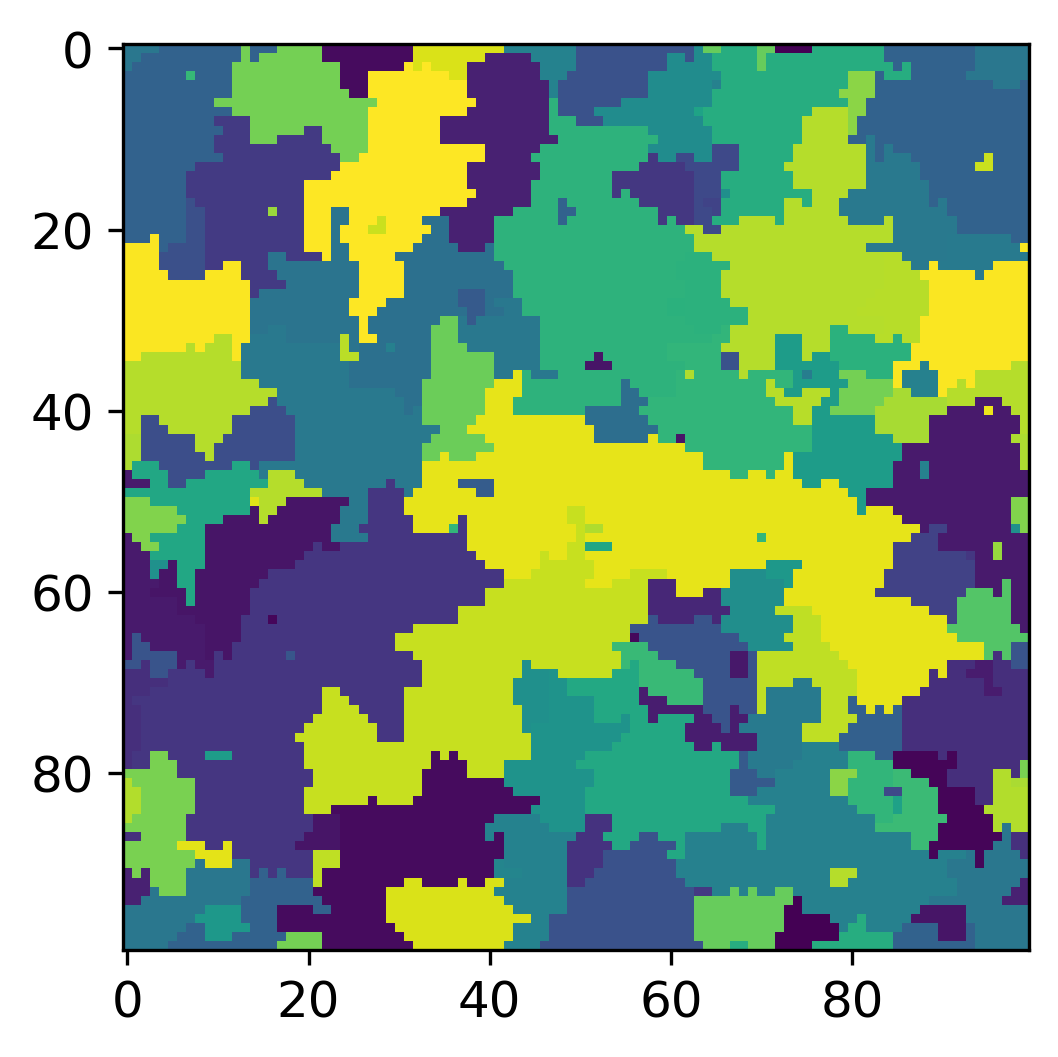

In [5]:
plt.imshow(grid)
plt.show()

Plot Species-Area curve in log-log space with fitted linear regression

[ 0.70666038 -0.78395421]


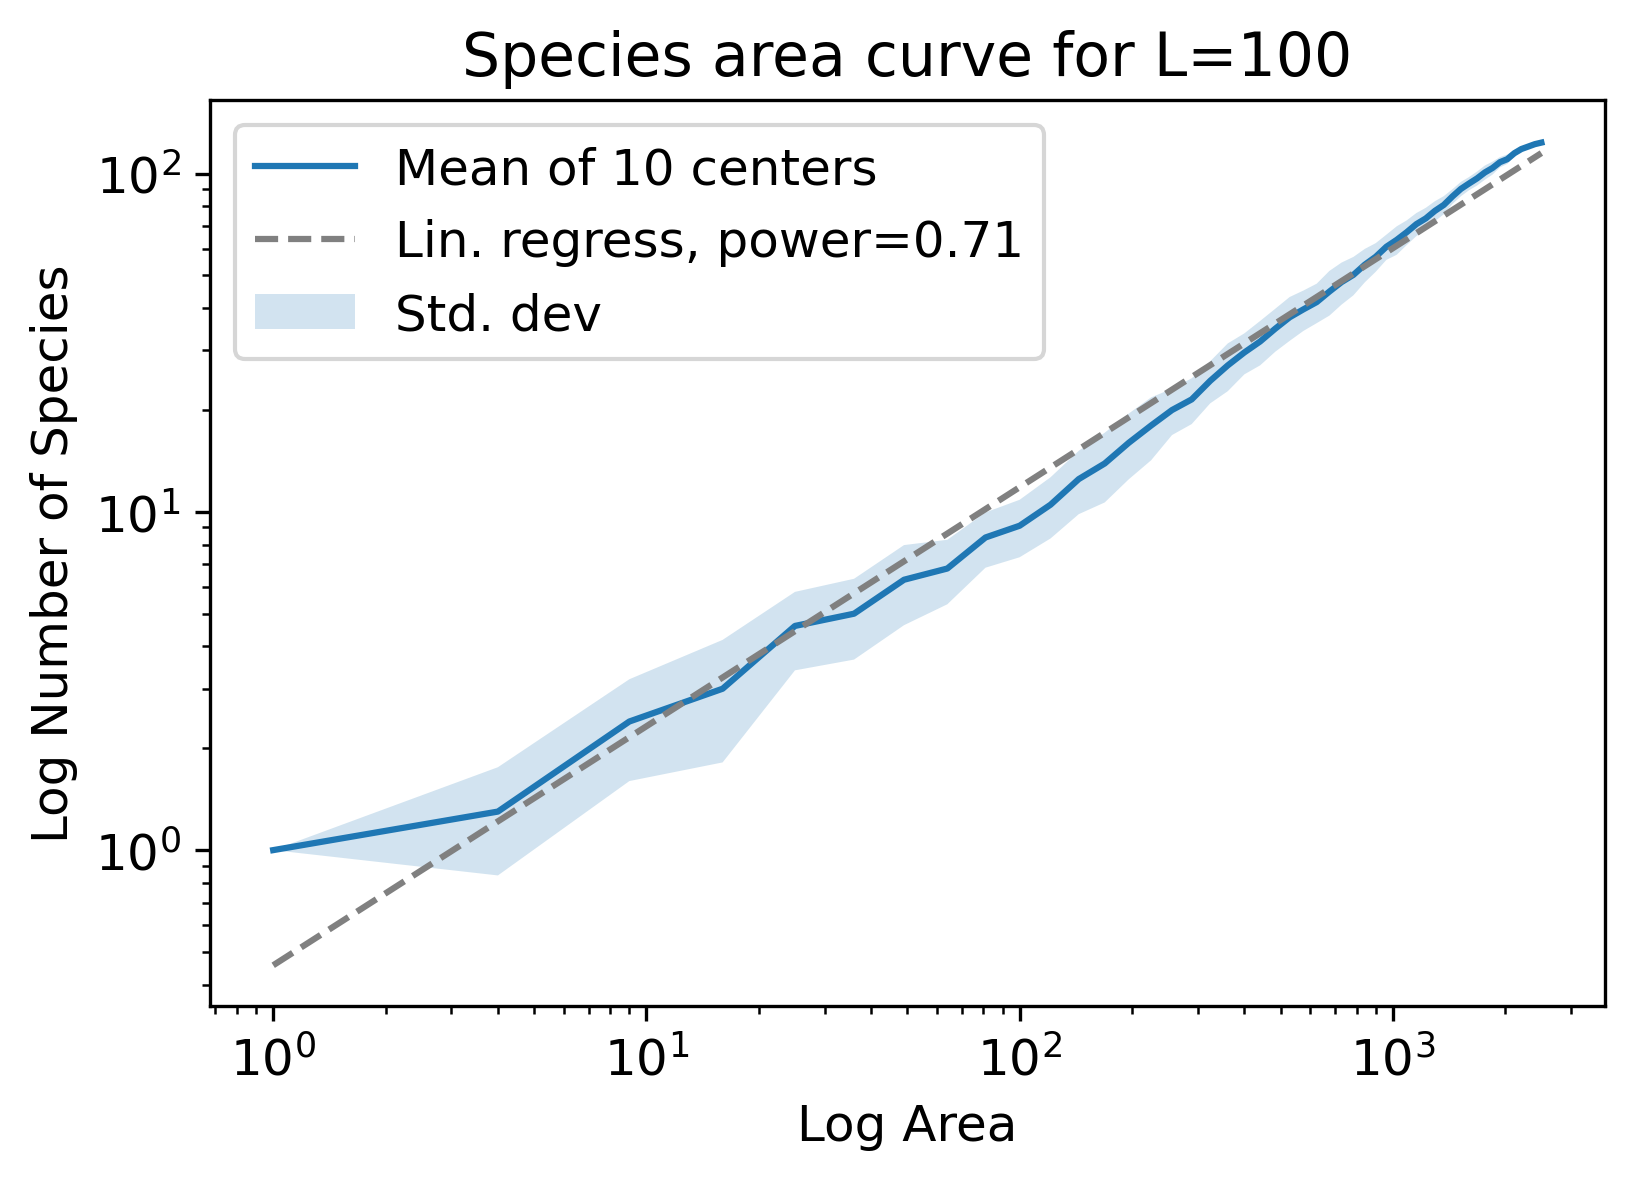

In [7]:
# Takes mean curve from computation 10 random centers
areas, species = sa_curve(grid,10)

# Compute mean and standard deviation of curves
spec_std_dev = np.std(species, axis=0)
spec_mean = np.mean(species, axis=0)

# Fit linear regression
poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)

# Plot SA curve on log-log scale
plt.loglog(areas, spec_mean, label='Mean of 10 centers')

# Plot linear regression on SA curve in log-log scale
plt.loglog([areas[0], areas[-1]], 
           np.exp(poly_coeffs[1]) * np.array([areas[0], areas[-1]])**poly_coeffs[0], 
           color='grey', 
           linestyle='dashed',
           label=f'Lin. regress, power={round(poly_coeffs[0], 2)}')

# Plot standard deviation
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()